**Ce notebook contient les fonctions permettant de visualiser les résultats obtenues pendant le projet.**

In [3]:
import gzip, numpy, torch
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
import json
import os
import pandas as pd
import seaborn as sns

# Partie : Shallow Network

## Importation des données

In [4]:
with open('data/model_metrics_shallow_network.json') as json_file:
    data = json.load(json_file)

#on crée une liste vide pour stocker les données structurées
structured_data = []

# on parcourt les données du fichier
for entry in data:
    # on extrait les hypermatères
    hyperparameters = entry['hyperparameters']
    batch_size = hyperparameters['batch_size']
    nb_epochs = hyperparameters['nb_epochs']
    learning_rate = hyperparameters['learning_rate']
    nb_neurons = hyperparameters['nb_neurons']
    training_losses = entry['training_losses']
    validation_losses = entry['validation_losses']
    validation_accuracies = entry['validation_accuracies']
    final_validation_accuracy = entry['final_validation_accuracy']

    # on crée un dictionnaire avec les données structurées
    structured_data.append({
        'batch_size': batch_size,
        'nb_epochs': nb_epochs,
        'learning_rate': learning_rate,
        'nb_neurons': nb_neurons,
        'training_losses': training_losses,
        'validation_losses': validation_losses,
        'validation_accuracies': validation_accuracies,
        'final_validation_accuracy': final_validation_accuracy
    })

# on crée un dataframe avec les données structurées
df = pd.DataFrame(structured_data)
df.sort_values("final_validation_accuracy", ascending=False, inplace=True)

## Dataframe

In [ ]:
df[['learning_rate', 'batch_size', 'nb_epochs', 'nb_neurons', 'final_validation_accuracy']]

,learning_rate,batch_size,nb_epochs,nb_neurons,final_validation_accuracy
27,0.1000,8,50,100,0.981111
43,0.1000,16,50,100,0.979603
31,0.1000,8,100,100,0.979444
47,0.1000,16,100,100,0.979127
39,0.1000,16,20,100,0.978413
...,...,...,...,...,...
350,0.0001,64,10,25,0.273333
370,0.0001,128,20,25,0.252698
353,0.0001,64,20,10,0.226746
373,0.0001,128,50,10,0.221349


## Visualisation des graphiques

### Graphiques - hyperparamètres et performances

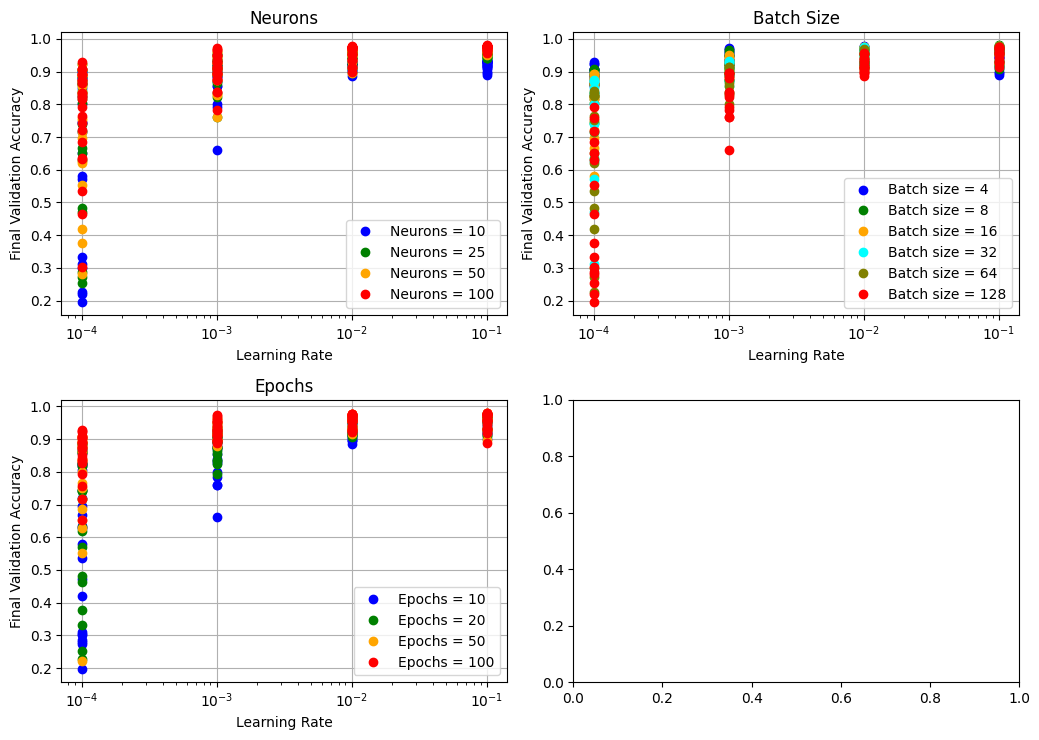

In [ ]:
# Create 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10.5, 7.5))

# Define a dictionary to assign colors for each neuron value
neuron_colors = {
    10: 'blue',
    25: 'green',
    50: 'orange',
    100: 'red'
}

# Define a dictionary to assign colors for each batch size
batch_size_colors = {
    4: 'blue',
    8: 'green',
    16: 'orange',
    32: 'cyan',
    64: 'olive',
    128: 'red'
}

# Define a dictionary to assign colors for each epoch value
epoch_colors = {
    10: 'blue',
    20: 'green',
    50: 'orange',
    100: 'red'
}

# Subplot 1: Different colors for neurons (10, 25, 50, 100)
for neurons, color in neuron_colors.items():
    df_neurons = df[df['nb_neurons'] == neurons]
    axs[0, 0].plot(df_neurons['learning_rate'], df_neurons['final_validation_accuracy'], 'o', color=color, label=f'Neurons = {neurons}')
axs[0, 0].set_xscale('log')
axs[0, 0].set_title('Neurons')
axs[0, 0].set_xlabel('Learning Rate')
axs[0, 0].set_ylabel('Final Validation Accuracy')
axs[0, 0].grid()
axs[0, 0].legend()

# Subplot 2: Different colors for batch size (4, 8, 16, 32, 64, 128)
for batch_size, color in batch_size_colors.items():
    df_batch = df[df['batch_size'] == batch_size]
    axs[0, 1].plot(df_batch['learning_rate'], df_batch['final_validation_accuracy'], 'o', color=color, label=f'Batch size = {batch_size}')
axs[0, 1].set_xscale('log')
axs[0, 1].set_title('Batch Size')
axs[0, 1].set_xlabel('Learning Rate')
axs[0, 1].set_ylabel('Final Validation Accuracy')
axs[0, 1].grid()
axs[0, 1].legend()

# Subplot 3: Different colors for epochs (10, 20, 50, 100)
for epochs, color in epoch_colors.items():
    df_epochs = df[df['nb_epochs'] == epochs]
    axs[1, 0].plot(df_epochs['learning_rate'], df_epochs['final_validation_accuracy'], 'o', color=color, label=f'Epochs = {epochs}')
axs[1, 0].set_xscale('log')
axs[1, 0].set_title('Epochs')
axs[1, 0].set_xlabel('Learning Rate')
axs[1, 0].set_ylabel('Final Validation Accuracy')
axs[1, 0].grid()
axs[1, 0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


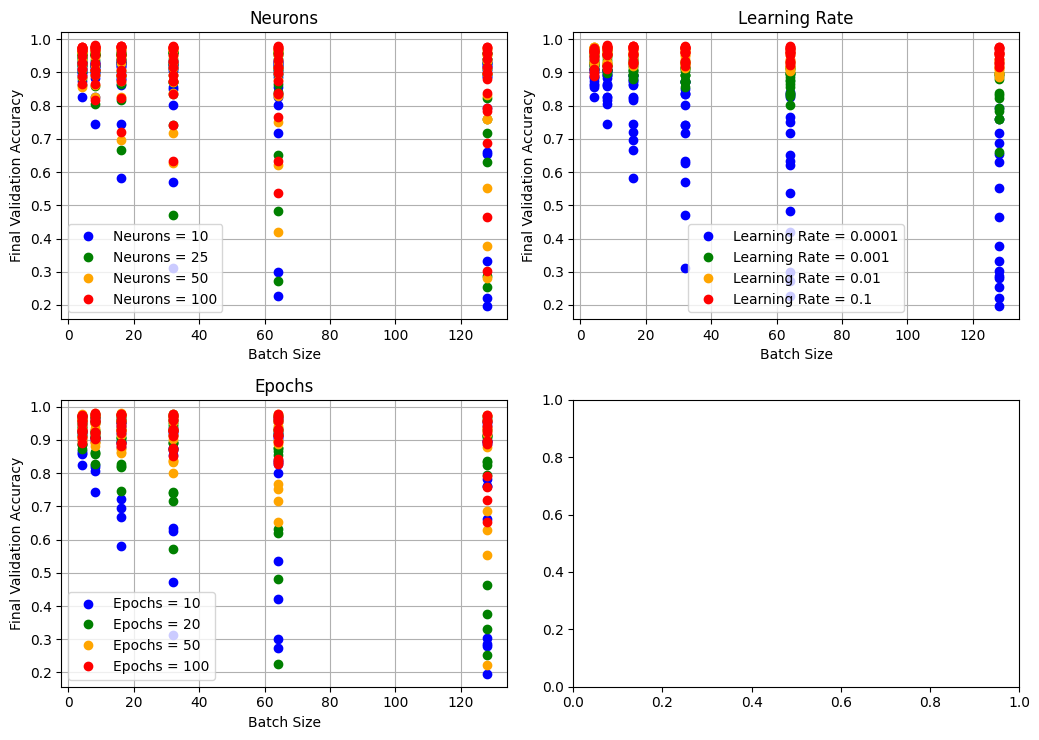

In [ ]:
# Create 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10.5, 7.5))

# Define a dictionary to assign colors for each neuron value
neuron_colors = {
    10: 'blue',
    25: 'green',
    50: 'orange',
    100: 'red'
}

# Define a dictionary to assign colors for each learning rate (for the second plot)
learning_rate_colors = {
    0.0001: 'blue',
    0.001: 'green',
    0.01: 'orange',
    0.1: 'red'
}

# Define a dictionary to assign colors for each epoch value
epoch_colors = {
    10: 'blue',
    20: 'green',
    50: 'orange',
    100: 'red'
}

# Subplot 1: Different colors for neurons (10, 25, 50, 100)
for neurons, color in neuron_colors.items():
    df_neurons = df[df['nb_neurons'] == neurons]
    axs[0, 0].plot(df_neurons['batch_size'], df_neurons['final_validation_accuracy'], 'o', color=color, label=f'Neurons = {neurons}')
axs[0, 0].set_title('Neurons')
axs[0, 0].set_xlabel('Batch Size')
axs[0, 0].set_ylabel('Final Validation Accuracy')
axs[0, 0].grid()
axs[0, 0].legend()

# Subplot 2: Different colors for learning rate (0.0001, 0.001, 0.01, 0.1)
for lr, color in learning_rate_colors.items():
    df_lr = df[df['learning_rate'] == lr]
    axs[0, 1].plot(df_lr['batch_size'], df_lr['final_validation_accuracy'], 'o', color=color, label=f'Learning Rate = {lr}')
axs[0, 1].set_title('Learning Rate')
axs[0, 1].set_xlabel('Batch Size')
axs[0, 1].set_ylabel('Final Validation Accuracy')
axs[0, 1].grid()
axs[0, 1].legend()

# Subplot 3: Different colors for epochs (10, 20, 50, 100)
for epochs, color in epoch_colors.items():
    df_epochs = df[df['nb_epochs'] == epochs]
    axs[1, 0].plot(df_epochs['batch_size'], df_epochs['final_validation_accuracy'], 'o', color=color, label=f'Epochs = {epochs}')
axs[1, 0].set_title('Epochs')
axs[1, 0].set_xlabel('Batch Size')
axs[1, 0].set_ylabel('Final Validation Accuracy')
axs[1, 0].grid()
axs[1, 0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


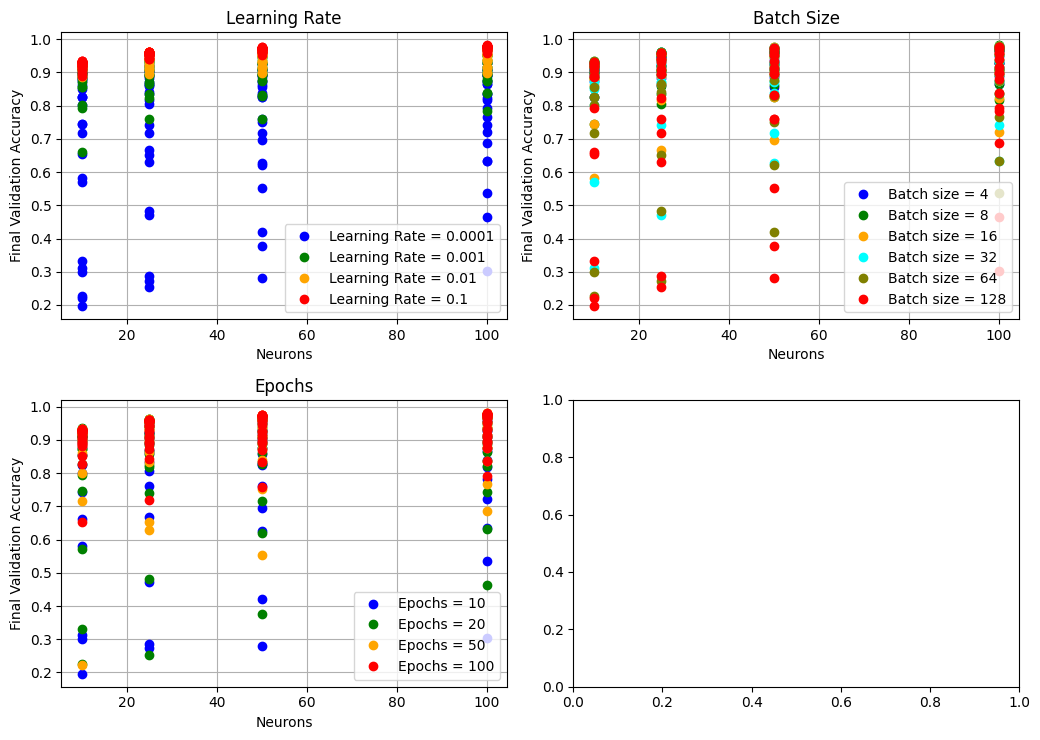

In [ ]:
# Create 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10.5, 7.5))

# Define a dictionary to assign colors for each learning rate value
learning_rate_colors = {
    0.0001: 'blue',
    0.001: 'green',
    0.01: 'orange',
    0.1: 'red'
}


# Define a dictionary to assign colors for each batch size
batch_size_colors = {
    4: 'blue',
    8: 'green',
    16: 'orange',
    32: 'cyan',
    64: 'olive',
    128: 'red'
}

# Define a dictionary to assign colors for each epoch value
epoch_colors = {
    10: 'blue',
    20: 'green',
    50: 'orange',
    100: 'red'
}

# Subplot 1: Different colors for learning rate (0.0001, 0.001, 0.01, 0.1)
for lr, color in learning_rate_colors.items():
    df_lr = df[df['learning_rate'] == lr]
    axs[0, 0].plot(df_lr['nb_neurons'], df_lr['final_validation_accuracy'], 'o', color=color, label=f'Learning Rate = {lr}')

axs[0, 0].set_title('Learning Rate')
axs[0, 0].set_xlabel('Neurons')
axs[0, 0].set_ylabel('Final Validation Accuracy')
axs[0, 0].grid()
axs[0, 0].legend()

# Subplot 2: Different colors for batch size (4, 8, 16, 32, 64, 128)
for batch_size, color in batch_size_colors.items():
    df_batch = df[df['batch_size'] == batch_size]
    axs[0, 1].plot(df_batch['nb_neurons'], df_batch['final_validation_accuracy'], 'o', color=color, label=f'Batch size = {batch_size}')

axs[0, 1].set_title('Batch Size')
axs[0, 1].set_xlabel('Neurons')
axs[0, 1].set_ylabel('Final Validation Accuracy')
axs[0, 1].grid()
axs[0, 1].legend()

# Subplot 3: Different colors for epochs (10, 20, 50, 100)
for epochs, color in epoch_colors.items():
    df_epochs = df[df['nb_epochs'] == epochs]
    axs[1, 0].plot(df_epochs['nb_neurons'], df_epochs['final_validation_accuracy'], 'o', color=color, label=f'Epochs = {epochs}')

axs[1, 0].set_title('Epochs')
axs[1, 0].set_xlabel('Neurons')
axs[1, 0].set_ylabel('Final Validation Accuracy')
axs[1, 0].grid()
axs[1, 0].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

### Corrélation hyperparamètres

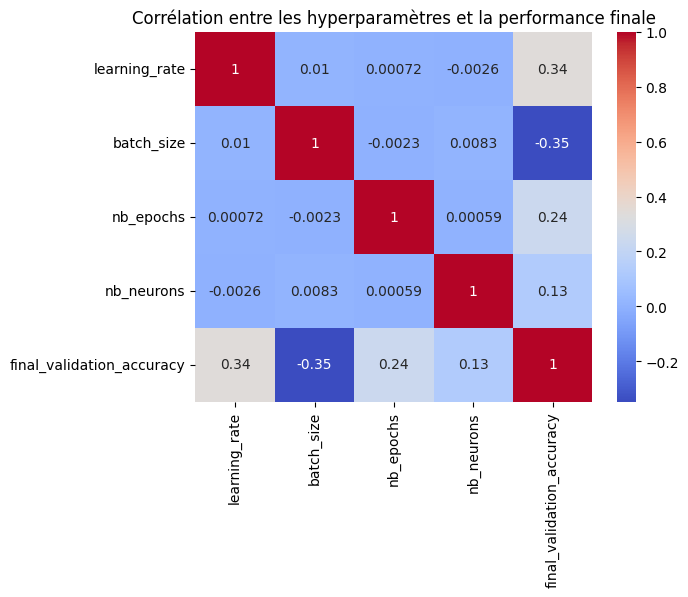

In [ ]:
corr_matrix = df[['learning_rate', 'batch_size', 'nb_epochs', 'nb_neurons', 'final_validation_accuracy']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les hyperparamètres et la performance finale')
plt.show()

### Courbes d'apprentissage

In [5]:
top_3_models = df.head(3) # on récupère les 5 meilleurs modèles
top_20_models = df.head(20) # on récupère les 5 meilleurs modèles
middle_3_models = df.iloc[len(df)//2+3:len(df)//2+6] # on récupère les 5 modèles du milieu
last_3_models = df.tail(3) # on récupère les 5 derniers modèles

In [7]:
# Define a function to plot loss curves for a group of models
def plot_loss_modelgrp(modelgrp, title):
    # Determine the number of models to plot
    num_models = len(modelgrp)

    # Create subplots (1 row, num_models columns)
    fig, axs = plt.subplots(1, num_models, figsize=(15, 5))

    # Iterate through the models in the group
    for index, (i, model) in enumerate(modelgrp.iterrows()):
        epochs = range(1, len(model['training_losses']) + 1)  # Get the number of epochs

        # Plot training and validation losses
        axs[index].plot(epochs, model['training_losses'], label='Training Loss', color='blue')
        axs[index].plot(epochs, model['validation_losses'], label='Validation Loss', color='orange')

        # Set titles and labels
        axs[index].set_title(f"Model {i+1}\nLR: {model['learning_rate']}, BS: {model['batch_size']}, Neurons: {model['nb_neurons']}, Epochs: {model['nb_epochs']}")
        axs[index].set_xlabel('Epochs')
        axs[index].set_ylabel('Loss')
        axs[index].legend()
        axs[index].grid(True)

    # Adjust layout
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
    plt.show()

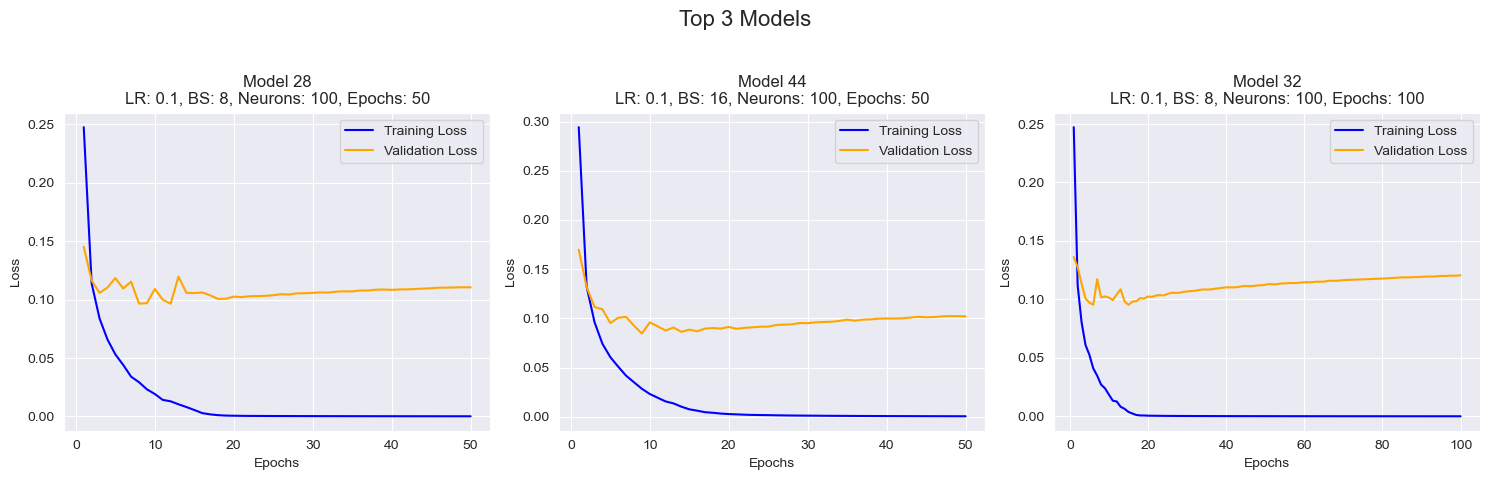

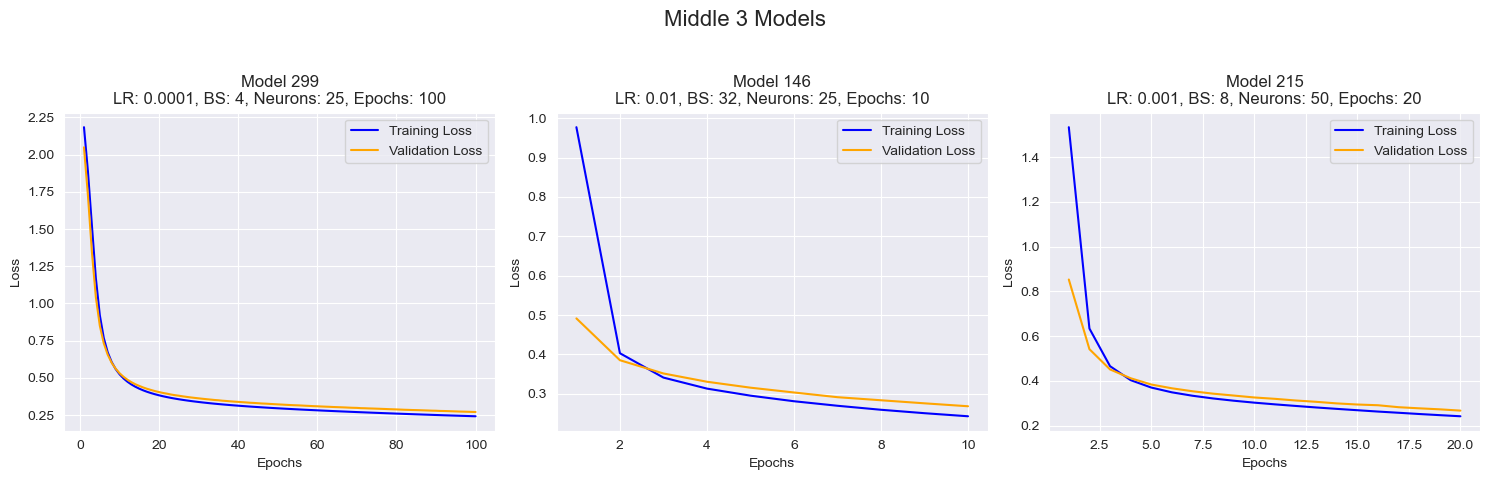

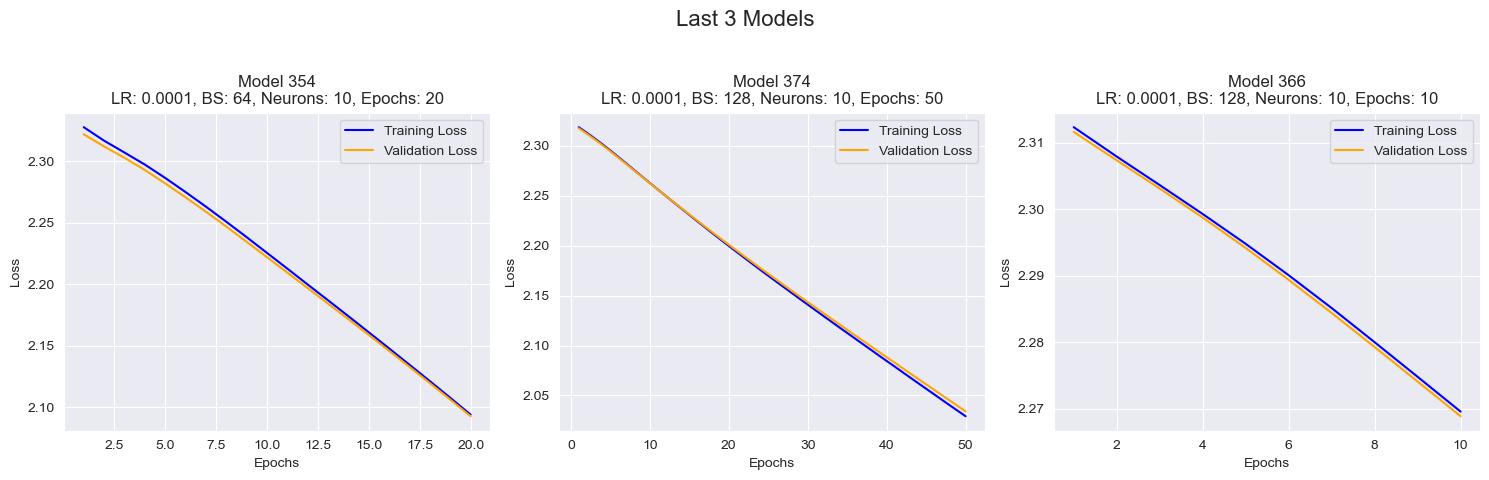

In [8]:
# Plot for the top 5 models
plot_loss_modelgrp(top_3_models, title="Top 3 Models")

# Plot for the middle 5 models
plot_loss_modelgrp(middle_3_models, title="Middle 3 Models")

# Plot for the last 5 models
plot_loss_modelgrp(last_3_models, title="Last 3 Models")

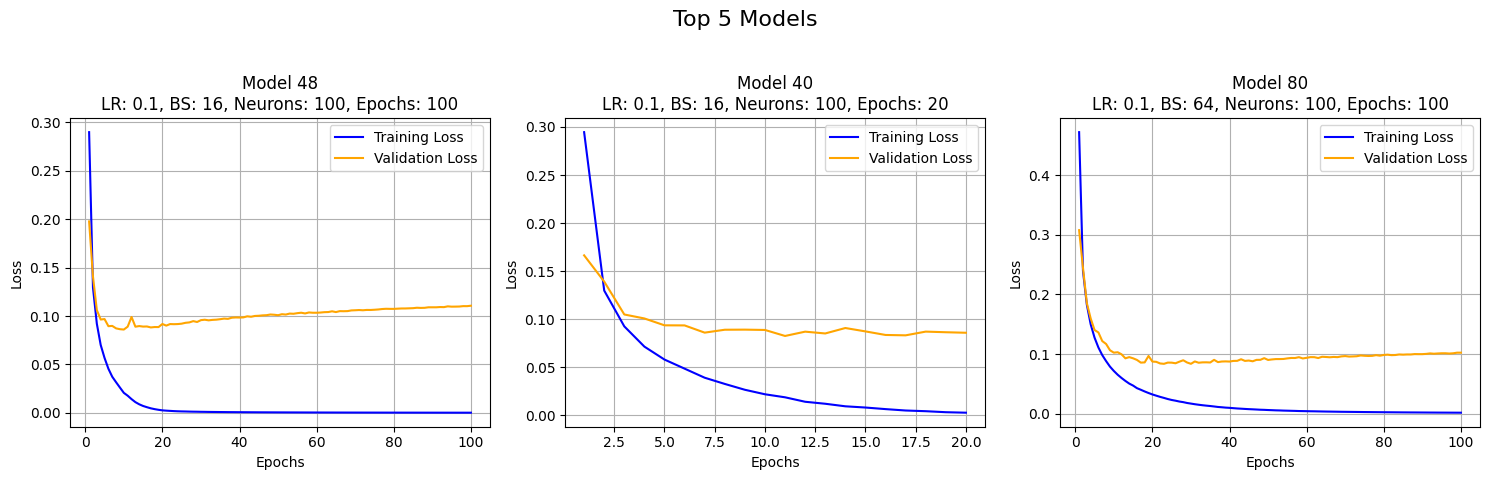

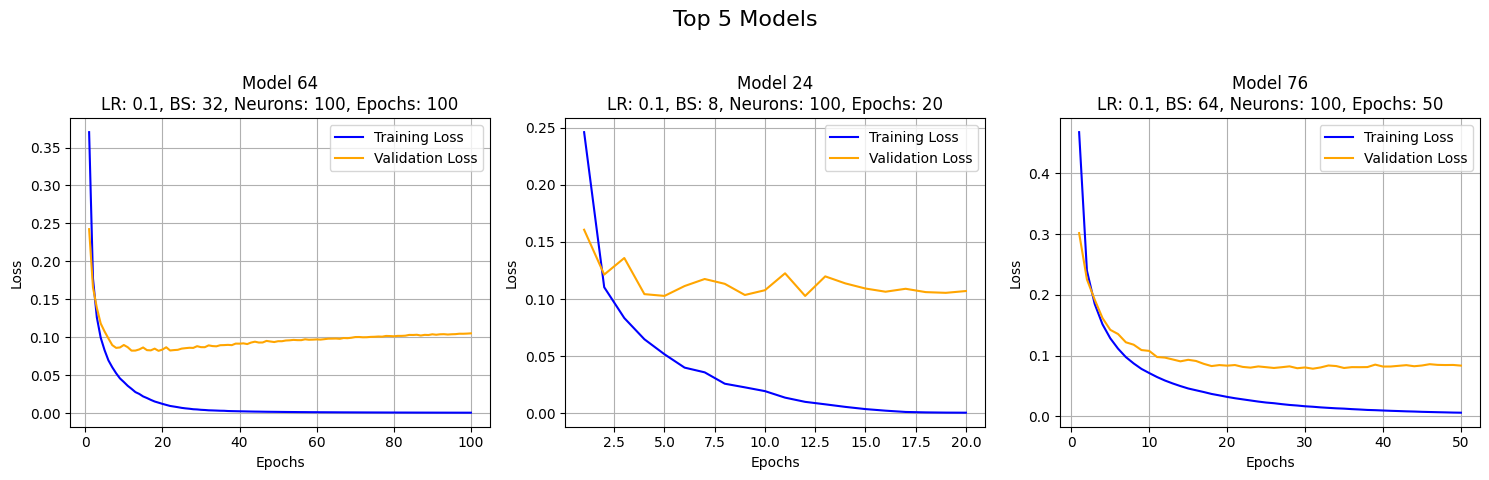

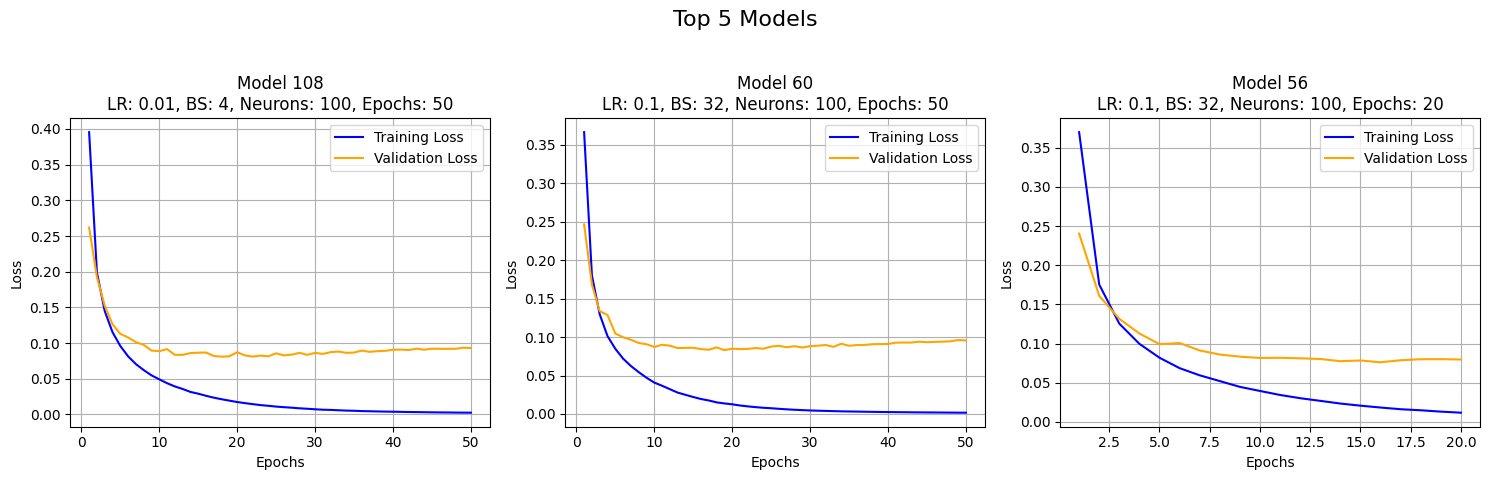

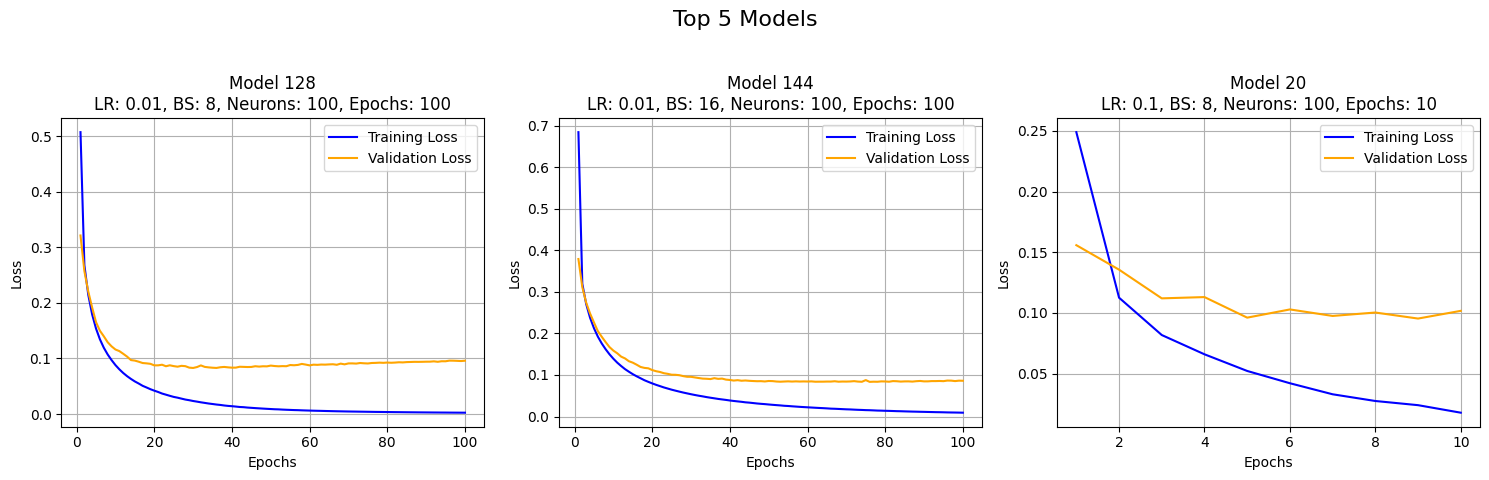

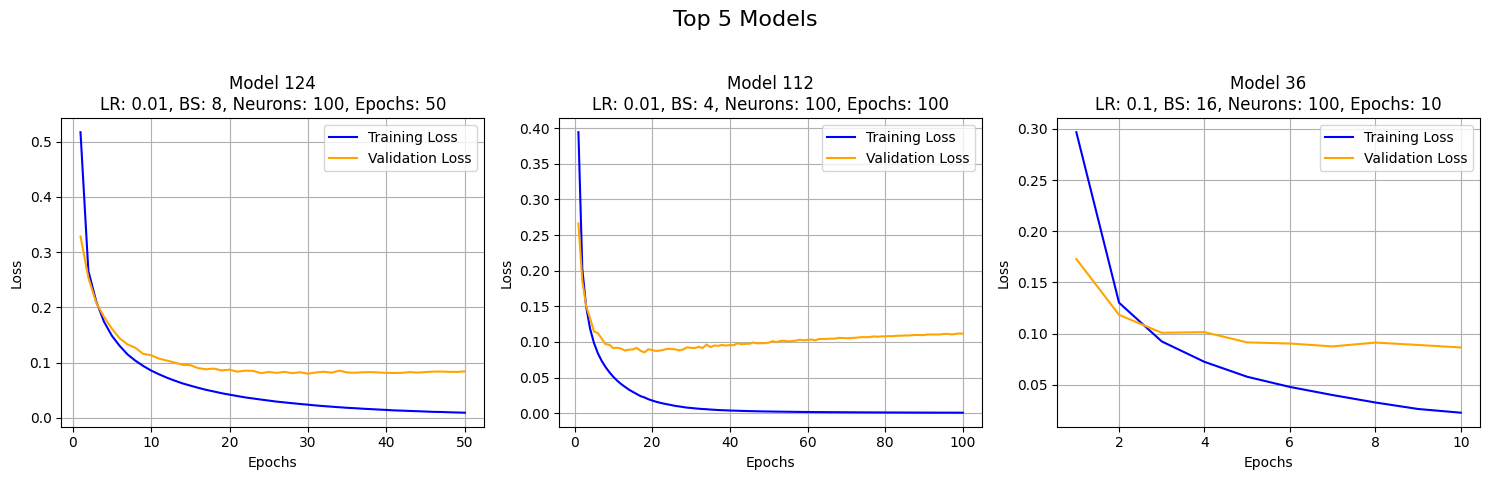

In [ ]:
for n in range(5):
  plot_loss_modelgrp(df.iloc[3+3*n:6+3*n], title="Top 5 Models")

# Partie : Deep Network

## Importation des données

In [11]:
#on transforme les données du fichier en dataframe
with open('data/model_metrics_DL_3L.json') as json_file:
    data = json.load(json_file)

#on crée une liste vide pour stocker les données structurées
structured_data = []

# on parcourt les données du fichier
for entry in data:
    # on extrait les hypermatères
    hyperparameters = entry['hyperparameters']
    batch_size = hyperparameters['batch_size']
    nb_epochs = hyperparameters['nb_epochs']
    learning_rate = hyperparameters['learning_rate']
    nb_neurons_1 = hyperparameters['nb_neurons_1']
    nb_neurons_2 = hyperparameters['nb_neurons_2']
    nb_neurons_3 = hyperparameters['nb_neurons_3']
    training_losses = entry['training_losses']
    validation_losses = entry['validation_losses']
    validation_accuracies = entry['validation_accuracies']
    final_validation_accuracy = entry['final_validation_accuracy']

    # on crée un dictionnaire avec les données structurées
    structured_data.append({
        'batch_size': batch_size,
        'nb_epochs': nb_epochs,
        'learning_rate': learning_rate,
        'nb_neurons_1': nb_neurons_1,
        'nb_neurons_2': nb_neurons_2,
        'nb_neurons_3': nb_neurons_3,
        'training_losses': training_losses,
        'validation_losses': validation_losses,
        'validation_accuracies': validation_accuracies,
        'final_validation_accuracy': final_validation_accuracy
    })

# on crée un dataframe avec les données structurées
df = pd.DataFrame(structured_data)
df.sort_values("final_validation_accuracy", ascending=False, inplace=True)

## Dataframe

In [ ]:
df[['learning_rate', 'batch_size', 'nb_epochs', 'nb_neurons_1', 'nb_neurons_2', 'nb_neurons_3', 'final_validation_accuracy']]

,learning_rate,batch_size,nb_epochs,nb_neurons_1,nb_neurons_2,nb_neurons_3,final_validation_accuracy
284,0.01,32,10,1024,10,1024,0.972143
173,0.01,32,10,1024,20,1024,0.971429
359,0.01,32,10,512,10,1024,0.971349
332,0.01,32,10,256,10,1024,0.970397
279,0.01,32,10,1024,10,512,0.970397
...,...,...,...,...,...,...,...
256,0.01,32,10,10,20,256,0.925556
68,0.01,32,10,10,256,512,0.925397
103,0.01,32,10,10,512,10,0.924683
158,0.01,32,10,10,32,256,0.922540


In [12]:
df.head(5)[['learning_rate', 'batch_size', 'nb_epochs', 'nb_neurons_1', 'nb_neurons_2', 'nb_neurons_3', 'final_validation_accuracy']]

,learning_rate,batch_size,nb_epochs,nb_neurons_1,nb_neurons_2,nb_neurons_3,final_validation_accuracy
284,0.01,32,10,1024,10,1024,0.972143
173,0.01,32,10,1024,20,1024,0.971429
359,0.01,32,10,512,10,1024,0.971349
332,0.01,32,10,256,10,1024,0.970397
279,0.01,32,10,1024,10,512,0.970397


## Visualisation des graphiques

### Courbes de perte d'entrainement et validation

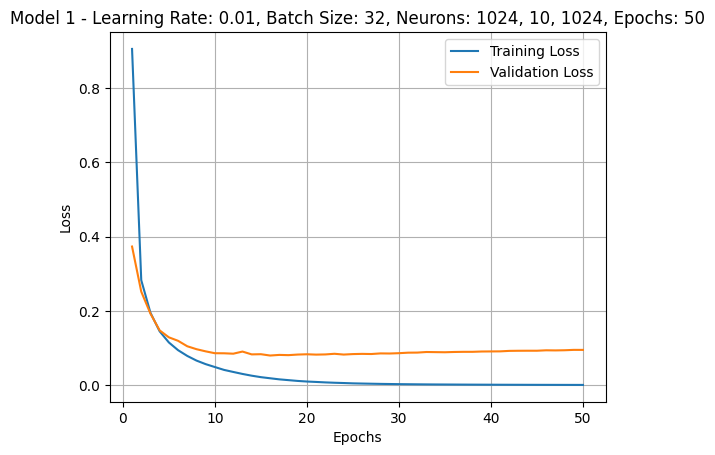

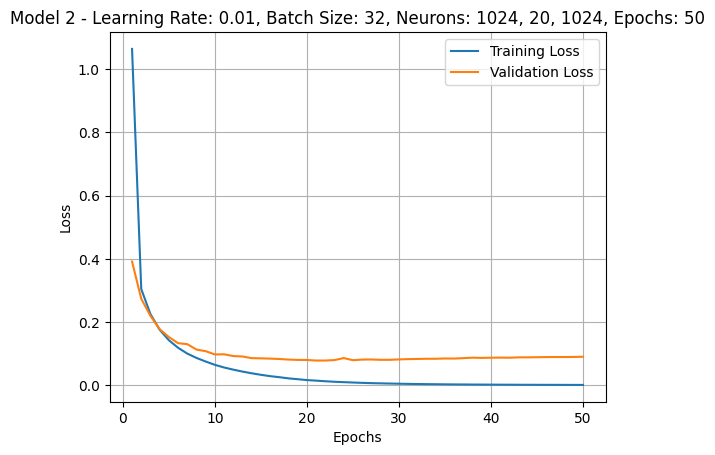

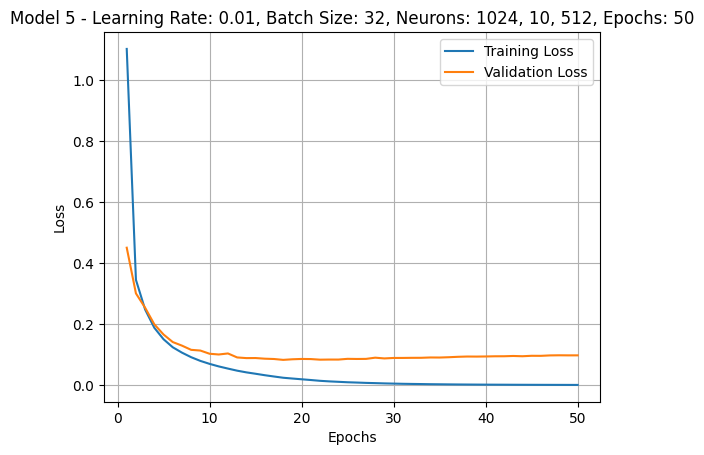

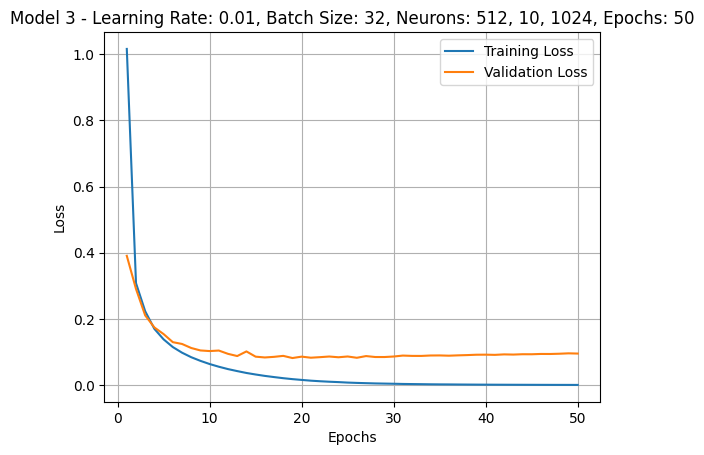

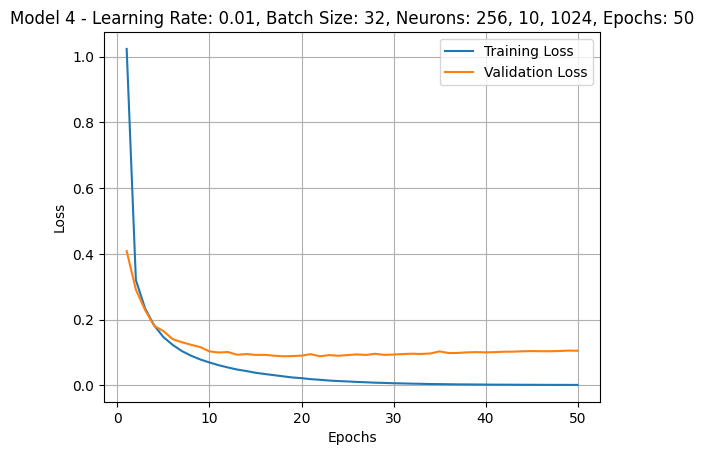

In [ ]:
# courbes de training et de validation loss en fonction des epochs pour les meilleurs modèles
def plot_loss_modelgrp(modelgrp):
    for index, model in modelgrp.iterrows():
        epochs = range(1,len(model['training_losses'])+1) # on récupère le nombre d'epochs

        # on trace les courbes
        plt.plot(epochs, model['training_losses'], label='Training Loss')
        plt.plot(epochs, model['validation_losses'], label='Validation Loss')

        plt.title(f"Model {index+1} - Learning Rate: {model['learning_rate']}, Batch Size: {model['batch_size']}, Neurons: {model['nb_neurons_1']}, {model['nb_neurons_2']}, {model['nb_neurons_3']}, Epochs: {model['nb_epochs']}")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_loss_modelgrp(df.head(5))